# **Jacob Shearer - Exercise Set 7**

In [4]:
import numpy as np
import scipy as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.cm import ScalarMappable

**Question 1**

Part (a):

In [75]:
def laplace_line(n_max, n_iter, h):
    n_points = int(n_max/h)
    V = np.zeros((n_points, n_points))   

    for k in range(0, n_points): 
        V[k,0] = 100.0  # fixed potential line at 100V

    for iter in range(n_iter):  # iterations over algorithm
        for i in range(1, n_points-1):                                                
            for j in range(1, n_points-1): V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
                
    x = np.arange(0, n_max, h)
    x_indices = np.array([s for s in range(len(x))])
    y = np.arange(0, n_max, h)
    y_indices = np.array([s for s in range(len(y))])
    X, Y = np.meshgrid(x, y)
    X_indices, Y_indices = np.meshgrid(x_indices, y_indices)


    def functz(V):  # Function returns V(x, y)
        z = V[X_indices,Y_indices]                        
        return z

    Z = functz(V)                          
    return X, Y, Z

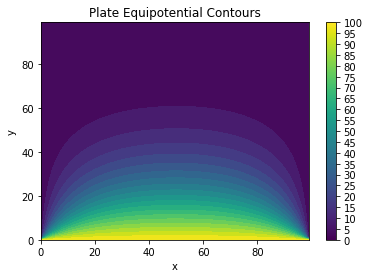

In [63]:
Nmax = 100
iterations = 1000
h = 1
X, Y, Z = laplace_line(Nmax, iterations, h)
fig, ax = plt.subplots()
qcs = ax.contourf(X, Y, Z, levels=np.arange(0, 105, 5))  # 5 volt contours
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Plate Equipotential Contours')
fig.colorbar(ScalarMappable(norm=qcs.norm, cmap=qcs.cmap), ticks=range(0, 105, 5))
plt.show()  

Part (b):

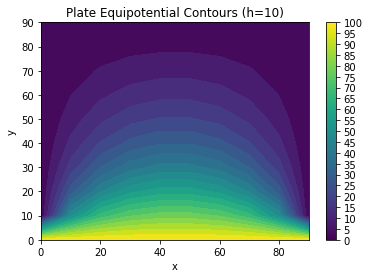

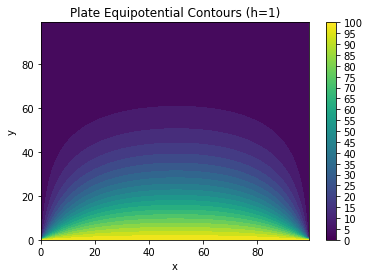

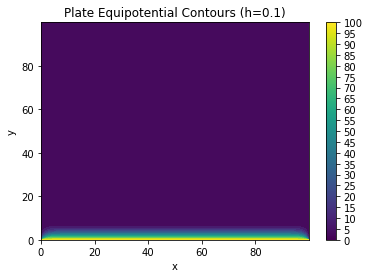

In [76]:
h_list = [10, 1, 0.1]
for h in h_list:
    Nmax = 100
    iterations = 1000
    X, Y, Z = laplace_line(Nmax, iterations, h)
    fig, ax = plt.subplots()
    qcs = ax.contourf(X, Y, Z, levels=np.arange(0, 105, 5))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Plate Equipotential Contours (h={h})')
    fig.colorbar(ScalarMappable(norm=qcs.norm, cmap=qcs.cmap), ticks=range(0, 105, 5))
    plt.show()  

Surprisingly (to me at least) the solution actually gets *worse* for smaller values of h. It becomes partitularly bad when h = 0.1, which indicates that, for a 100x100 grid, there is probably a threshold h somewhere between 0.1 and 1 for which the solution becomes unstable (and thus inaccurate). 

Part (c):

In [1]:
def laplace_line_converge(n_max, h, tolerance):
    n_points = int(n_max/h)
    V = np.zeros((n_points, n_points))   

    for k in range(0, n_points): 
        V[k,0] = 100.0  # fixed potential line at 100V
    

    n_iter = 0
    while True:
        print(f'{n_iter}:')
        for i in range(1, n_points-1):                                                
            for j in range(1, n_points-1): V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
        
        convergence_sum = 0
        expected_potential = 100
        for k in range(0, n_points):
            accepted = False
            if np.abs(expected_potential - V[50,k]) <= tolerance:
                convergence_sum += 1
                accepted = True
            
            print(V[50, k], accepted)
            expected_potential -= 1
        
        print('\n')
        n_iter += 1
        if convergence_sum == 100 or n_iter > 12000:
            break
                
    x = np.arange(0, n_max, h)
    x_indices = np.array([s for s in range(len(x))])
    y = np.arange(0, n_max, h)
    y_indices = np.array([s for s in range(len(y))])
    X, Y = np.meshgrid(x, y)
    X_indices, Y_indices = np.meshgrid(x_indices, y_indices)


    def functz(V):  # Function returns V(x, y)
        z = V[X_indices,Y_indices]                        
        return z


    Z = functz(V)                          
    return X, Y, Z, n_iter

Nmax = 100
h = 1
tolerance = 10
X, Y, Z, n_iter = laplace_line_converge(Nmax, h, tolerance)
fig, ax = plt.subplots()
qcs = ax.contourf(X, Y, Z, levels=np.arange(0, 105, 5))  # 5 volt contours
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Plate Equipotential Contours')
fig.colorbar(ScalarMappable(norm=qcs.norm, cmap=qcs.cmap), ticks=range(0, 105, 5))
plt.show()
print(n_iter)

NameError: name 'np' is not defined

Part (d):

In [2]:
def laplace_line_relax(n_max, h, alpha, tolerance):
    n_points = int(n_max/h)
    V = np.zeros((n_points, n_points))   

    for k in range(0, n_points): 
        V[k,0] = 100.0  # fixed potential line at 100V
    

    n_iter = 0
    old_V = V
    while True:
        for i in range(1, n_points-1):                                                
            for j in range(1, n_points-1): V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
                
        V = V + alpha*(V - old_V)
        
        convergence_sum = 0
        expected_potential = 100
        for k in range(0, n_points):
            accepted = False
            if np.abs(expected_potential - V[50,k]) <= tolerance:
                convergence_sum += 1
                accepted = True
            
            expected_potential -= 1
            old_V = V
        
        n_iter += 1
#         print(n_iter, convergence_sum)
        if convergence_sum == 100:
            break
                
    x = np.arange(0, n_max, h)
    x_indices = np.array([s for s in range(len(x))])
    y = np.arange(0, n_max, h)
    y_indices = np.array([s for s in range(len(y))])
    X, Y = np.meshgrid(x, y)
    X_indices, Y_indices = np.meshgrid(x_indices, y_indices)


    def functz(V):  # Function returns V(x, y)
        z = V[X_indices,Y_indices]                        
        return z


    Z = functz(V)                          
    return X, Y, Z, n_iter

alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for alpha in alpha_list:
    Nmax = 100
    h = 1
    tolerance = 10
    X, Y, Z, n_iter = laplace_line_relax(Nmax, h, alpha, tolerance)
    fig, ax = plt.subplots()
    qcs = ax.contourf(X, Y, Z, levels=np.arange(0, 105, 5))  # 5 volt contours
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Plate Equipotential Contours')
    fig.colorbar(ScalarMappable(norm=qcs.norm, cmap=qcs.cmap), ticks=range(0, 105, 5))
    plt.show()
    print(n_iter)

NameError: name 'np' is not defined